<a href="https://colab.research.google.com/github/trongtin2001/BAITAP_AI/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thư viện
import numpy as np #thư viện xử lý ma trận
from keras.utils import np_utils # thư viện xử lý chuyển class
from keras.datasets import cifar100 # gọi tập dataset động vật, máy bay 
from keras.models import Sequential # hàm chạy mô hình
from keras.layers import Dense, Dropout # tạo mạng nơ ron
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt  # thư viện dùng để vẽ
from keras.backend import dropout

In [ ]:
# chia tập dữ liệu thành 2 bộ train và test
(x_train, y_train),(x_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 6s 0us/step


In [ ]:
# xem kích thược của tập dữ liệu
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (50000, 32, 32, 3)
Kích thước y_train:  (50000, 1)
Kích thước x_test:  (10000, 32, 32, 3)
Kích thước y_test:  (10000, 1)


In [ ]:
#chuyển chiều của x từ 3 chiều về 2 chiều VÌ cifar10 ở đầu vào có 4 chiều để chuyển về
# 2 chiều bằng cách 32*32*3=3072
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
# ép kiểu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#chuẩn hóa dữ liệu
x_train /=255
x_test /=255
#chuyển y từ 1 class thành 10 class
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [ ]:
#tạo mạng nơ-ron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 1000)              513000    
                                                                 
 dropout_9 (Dropout)         (None, 1000)              0         
                                                                 
 dense_12 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_10 (Dropout)        (None, 1000)              0         
                                                                 
 dense_13 (Dense)            (None, 512)              

In [ ]:
#chạy model với số lần học là 500 và độ kiên nhẫn là 100
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=100)])

Epoch 1/500
313/313 [==============================] - 30s 91ms/step - loss: 4.5001 - accuracy: 0.0207 - val_loss: 4.3203 - val_accuracy: 0.0308
Epoch 2/500
313/313 [==============================] - 28s 89ms/step - loss: 4.2086 - accuracy: 0.0477 - val_loss: 4.0769 - val_accuracy: 0.0658
Epoch 3/500
313/313 [==============================] - 28s 88ms/step - loss: 4.0336 - accuracy: 0.0712 - val_loss: 3.9474 - val_accuracy: 0.0883
Epoch 4/500
313/313 [==============================] - 28s 88ms/step - loss: 3.9438 - accuracy: 0.0851 - val_loss: 3.8520 - val_accuracy: 0.1010
Epoch 5/500
313/313 [==============================] - 27s 88ms/step - loss: 3.8717 - accuracy: 0.0952 - val_loss: 3.8155 - val_accuracy: 0.1049
Epoch 6/500
313/313 [==============================] - 28s 88ms/step - loss: 3.8225 - accuracy: 0.1011 - val_loss: 3.7628 - val_accuracy: 0.1102
Epoch 7/500
313/313 [==============================] - 28s 88ms/step - loss: 3.7770 - accuracy: 0.1111 - val_loss: 3.8066 - val_ac

Sai số kiểm tra là:  3.374751091003418
Độ chính xác kiểm tra là:  0.20880000293254852


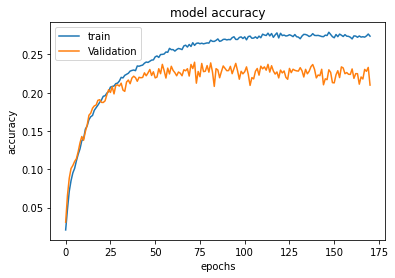

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
#vẽ đồ thị
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()